# Maxwell-Boltzmann Distribution

Notebook to compute the Maxwell-Boltzmann distribution for various temperatures and species.


In [11]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

#### Figure Filename

`figName` sets the figure filename of the form `Fig<chapterNum>_<figNum>`, the figure number may also 
include a lowercase  letter for a subfigure (e.g., Fig1_2a).  

#### Aspect Ratio

`aspect` sets the aspect ratio, width/height.  The default aspect ratio is 4:3, 1:1 for square plots, 
and 5:2 (2.5:1) for spectra, and equal aspect ratio for images and plots of Cartesian coordinates.
Use a formula instead of decimal when the result is a fraction (example: `aspect = 4.0/3.0` instead of
`aspect=1.33`).

In [12]:
figName = 'mbDist' 

# graphic aspect ratio = width/height

aspect = 16.0/9.0 # 4.0/3.0 # 4:3

# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)


figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth
hInches = wInches/aspect
        
axisFontSize = 10 # np.rint(axisFontSize/scaleFac)
labelFontSize = 8 # np.rint(labelFontSize/scaleFac)

# Plot filename

plotFile = f'{figName}.{figFmt}'

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

# print a summary (uncomment as needed)

print(f'Filename: {plotFile}')
print(f'Size: {wInches:.2f} x {hInches:.2f}-in ({plotWidth} x {plotHeight} pix)')
print(f'Aspect Ratio: {aspect:.2f}:1')
print(f'Fonts: axes={axisFontSize:.1f} pt, intraplot labels={labelFontSize:.1f}')

Filename: mbDist.png
Size: 6.00 x 3.38-in (3600.0 x 2025.0 pix)
Aspect Ratio: 1.78:1
Fonts: axes=10.0 pt, intraplot labels=8.0


## Physical constants

From the NIST database of fundamental physical constants [physics.nist.gov/cuu/Constants/](https://physics.nist.gov/cuu/Constants/) which uses the CODATA18 values

In [13]:
k = 1.380649e-23 # J/K, exact definition from CODATA18

amu = 1.6605390666e-27 # atomic mass constant in kg

G = 6.67430e-11 # m3 kg-1 s-2, Newtonian gravitational constant

eV = 1.602176634E-19 # J exact

## Astronomical Constants

Useful astronomical constants from IAU 2015 Resolution B3 nominal solar and planetary quantities.

In [14]:
Re = 6378.1 # km - earth equatorial radius

GMe = 3.986004e14 # m3 s-2 Earth mass parameters

Me = GMe/G # in kg if we need it.

## Maxwell-Boltzmann distribution

### mbDist(v,mu,T)

Computes the Maxwell-Boltzmann distribution for all velocities v given $\mu$ and T.  
\begin{equation}
  F(v)dv = 4\pi\left(\frac{m}{2\pi kT}\right)^{3/2}v^2\exp\left(-\frac{1}{2}mv^2/kT\right)dv
\end{equation}

Parameters:
  * v - array of speeds to compute MB
  * mu - molecular weight of the species in amu (e.g., H<sub>2</sub> has $\mu$=2)
  * T - temperature in K
  
### mbEDist(E,T)

Computes the Maxwell-Boltzmann distribution for energies E given $\mu$ and T.  
\begin{equation}
  F(E)dE = \frac{2}{\sqrt{\pi}kT}\left(\frac{E}{kT}\right)^{1/2} e^{-E/kT}dE
\end{equation}

Parameters:
  * E - array of kinetic energy to compute MB
  * T - temperature in K
  
### mbSpeeds(mu,T)

Computes the speeds associated with a Maxwell-Boltzmann distribution for species with molecular weight $\mu$ and temperature T.

Parameters:
  * mu - molecular weight of the species in amu (e.g., H<sub>2</sub> has $\mu$=2)
  * T - temperature in K

Returns:
  * vpeak - peak (most probable) speed in m/s
  * vavg - average speed in m/s
  * vrms - root-mean square speed in m/s

In [15]:
def mbDist(v,mu,T):
    mkg = mu*amu
    varg = 0.5*mkg*v*v/(k*T)
    arg1 = (mkg/(2*math.pi*k*T))**1.5
    return 4.0*math.pi*arg1*v*v*np.exp(-varg)

def mbEDist(E,T):
    EkT = E/(k*T)
    return (2.0/(math.sqrt(math.pi)*k*T))*np.sqrt(EkT)*np.exp(-EkT)
    
def mbSpeeds(mu,T):
    mkg = mu*amu
    vpeak = math.sqrt(2.0*k*T/mkg)
    vavg  = math.sqrt(8.0*k*T/(math.pi*mkg))
    vrms  = math.sqrt(3.0*k*T/mkg)
    return vpeak,vavg,vrms

## Moments and Speeds for the M-B distribution

Plot the Maxwell-Boltzmann distribution for N<sub>2</sub> for T=300K, and plot the various speeds computed from 
the distribuion
 * $v_p$ - most probable (peak) speed
 * $\langle v\rangle$ - mean speed (first moment)
 * $v_{rms}$ - RMS speed

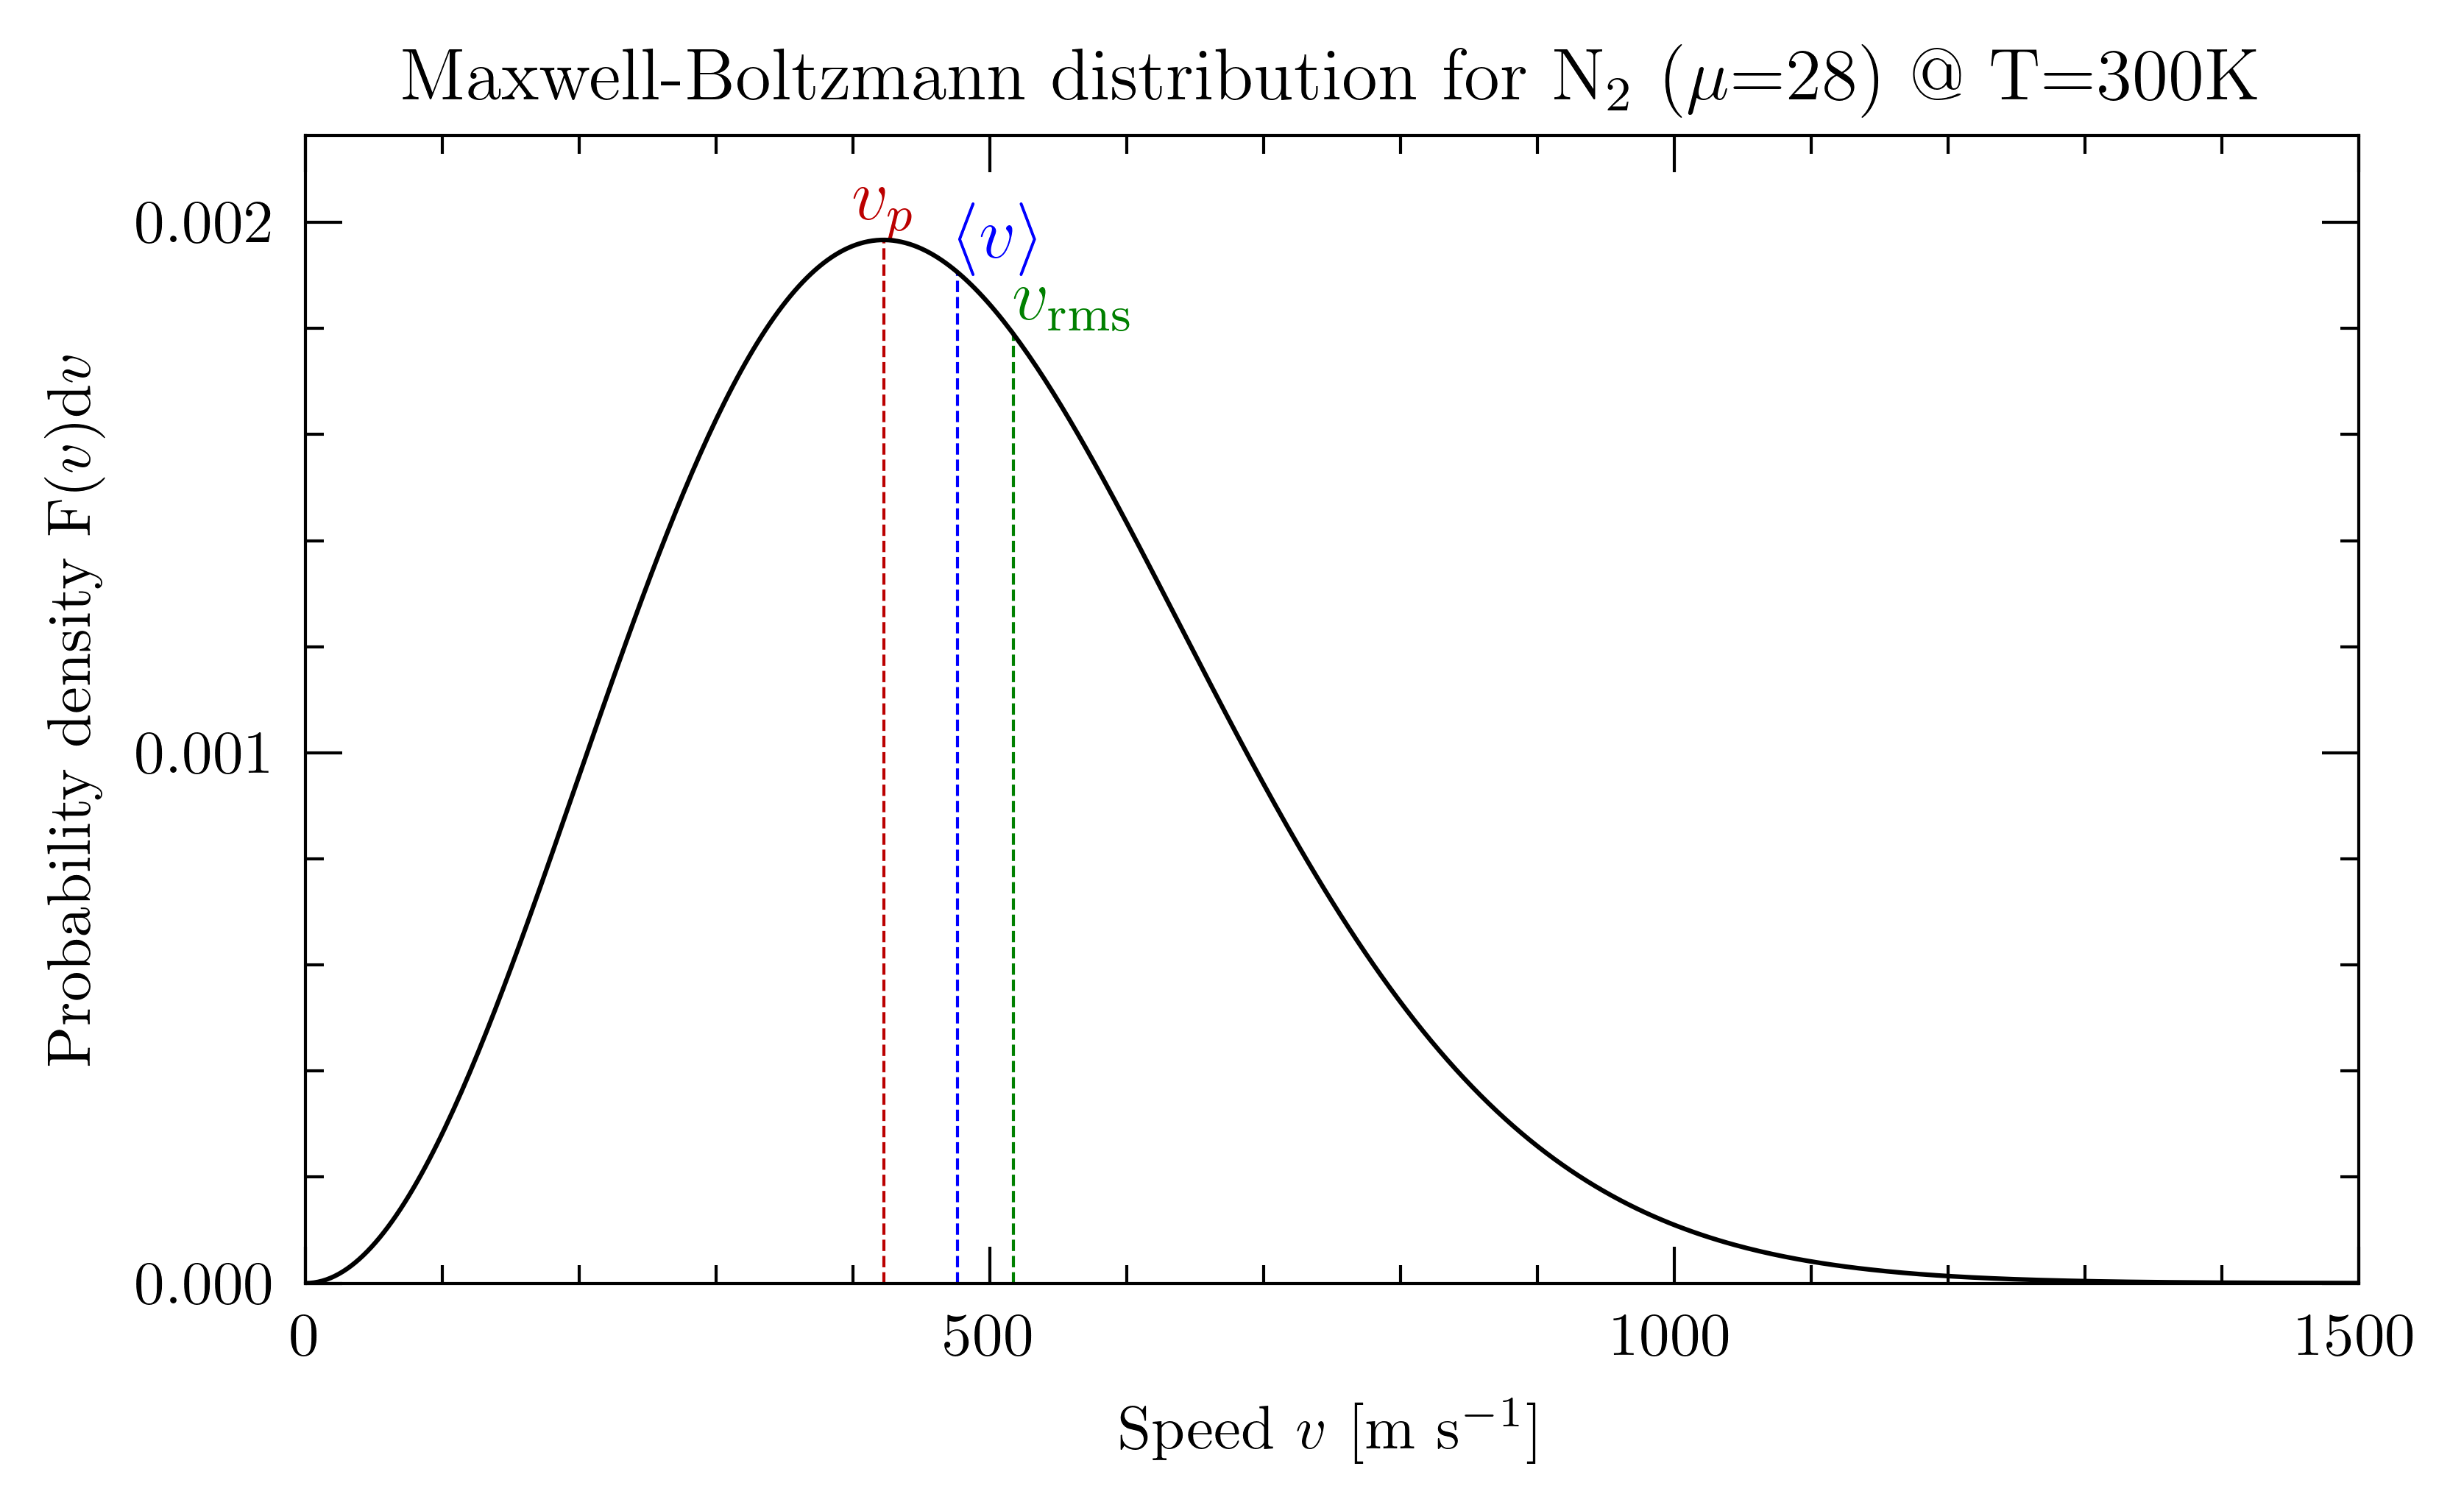

In [16]:
# Species is N2

species = "N$_2$"
mu = 28.0

# Temperature to compute

T = 300.0 # Kelvin

# speed range

vMin = 0.0 # m/sec
vMax = 1500.0

v = np.linspace(vMin,vMax,501)

mb = mbDist(v,mu,T)
mbMin = 0.0
mbMax = 1.1*np.max(mb)

# compute the M-B distribution speeds

vpk,vavg,vrms = mbSpeeds(mu,T)

# values of M-B distribution at each v

pkMB = mbDist(vpk,mu,T)
avgMB = mbDist(vavg,mu,T)
rmsMB = mbDist(vrms,mu,T)

# Plot it

fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(vMin,vMax)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.set_xlabel(r'Speed $v$ [m s$^{-1}$]',fontsize=axisFontSize)

ax.set_ylim(mbMin,mbMax)
ax.yaxis.set_major_locator(MultipleLocator(0.001))
ax.yaxis.set_minor_locator(MultipleLocator(0.0002))
ax.set_ylabel(r'Probability density F($v$)d$v$',fontsize=axisFontSize)

ax.plot(v,mb,'-',color='black',lw=0.75,zorder=10)

ax.vlines(vpk,mbMin,pkMB,ls=['--'],colors=['#bb0000'],lw=0.5)
ax.text(vpk,1.02*pkMB,r'$v_p$',color='#bb0000',ha='center',fontsize=12)

ax.vlines(vavg,mbMin,avgMB,ls=['--'],colors=['blue'],lw=0.5)
ax.text(vavg,1.015*avgMB,r'$\langle v\rangle$',color='blue',ha='left',fontsize=12)

ax.vlines(vrms,mbMin,rmsMB,ls=['--'],colors=['green'],lw=0.5)
ax.text(vrms,1.015*rmsMB,r'$v_{\rm rms}$',color='green',ha='left',fontsize=12)

plt.title(r'Maxwell-Boltzmann distribution for %s ($\mu$=%d) @ T=%dK' % (species,int(mu),int(T)),fontsize=12)
plt.savefig(f'{figName}_N2_300K.png',bbox_inches='tight',facecolor='white')

plt.show()

## M-B for 1 species, 2 temperatures

Plot the Maxwell-Boltzmann distribution for N<sub>2</sub> for T=300K and T=1200K, and plot the peak speed.

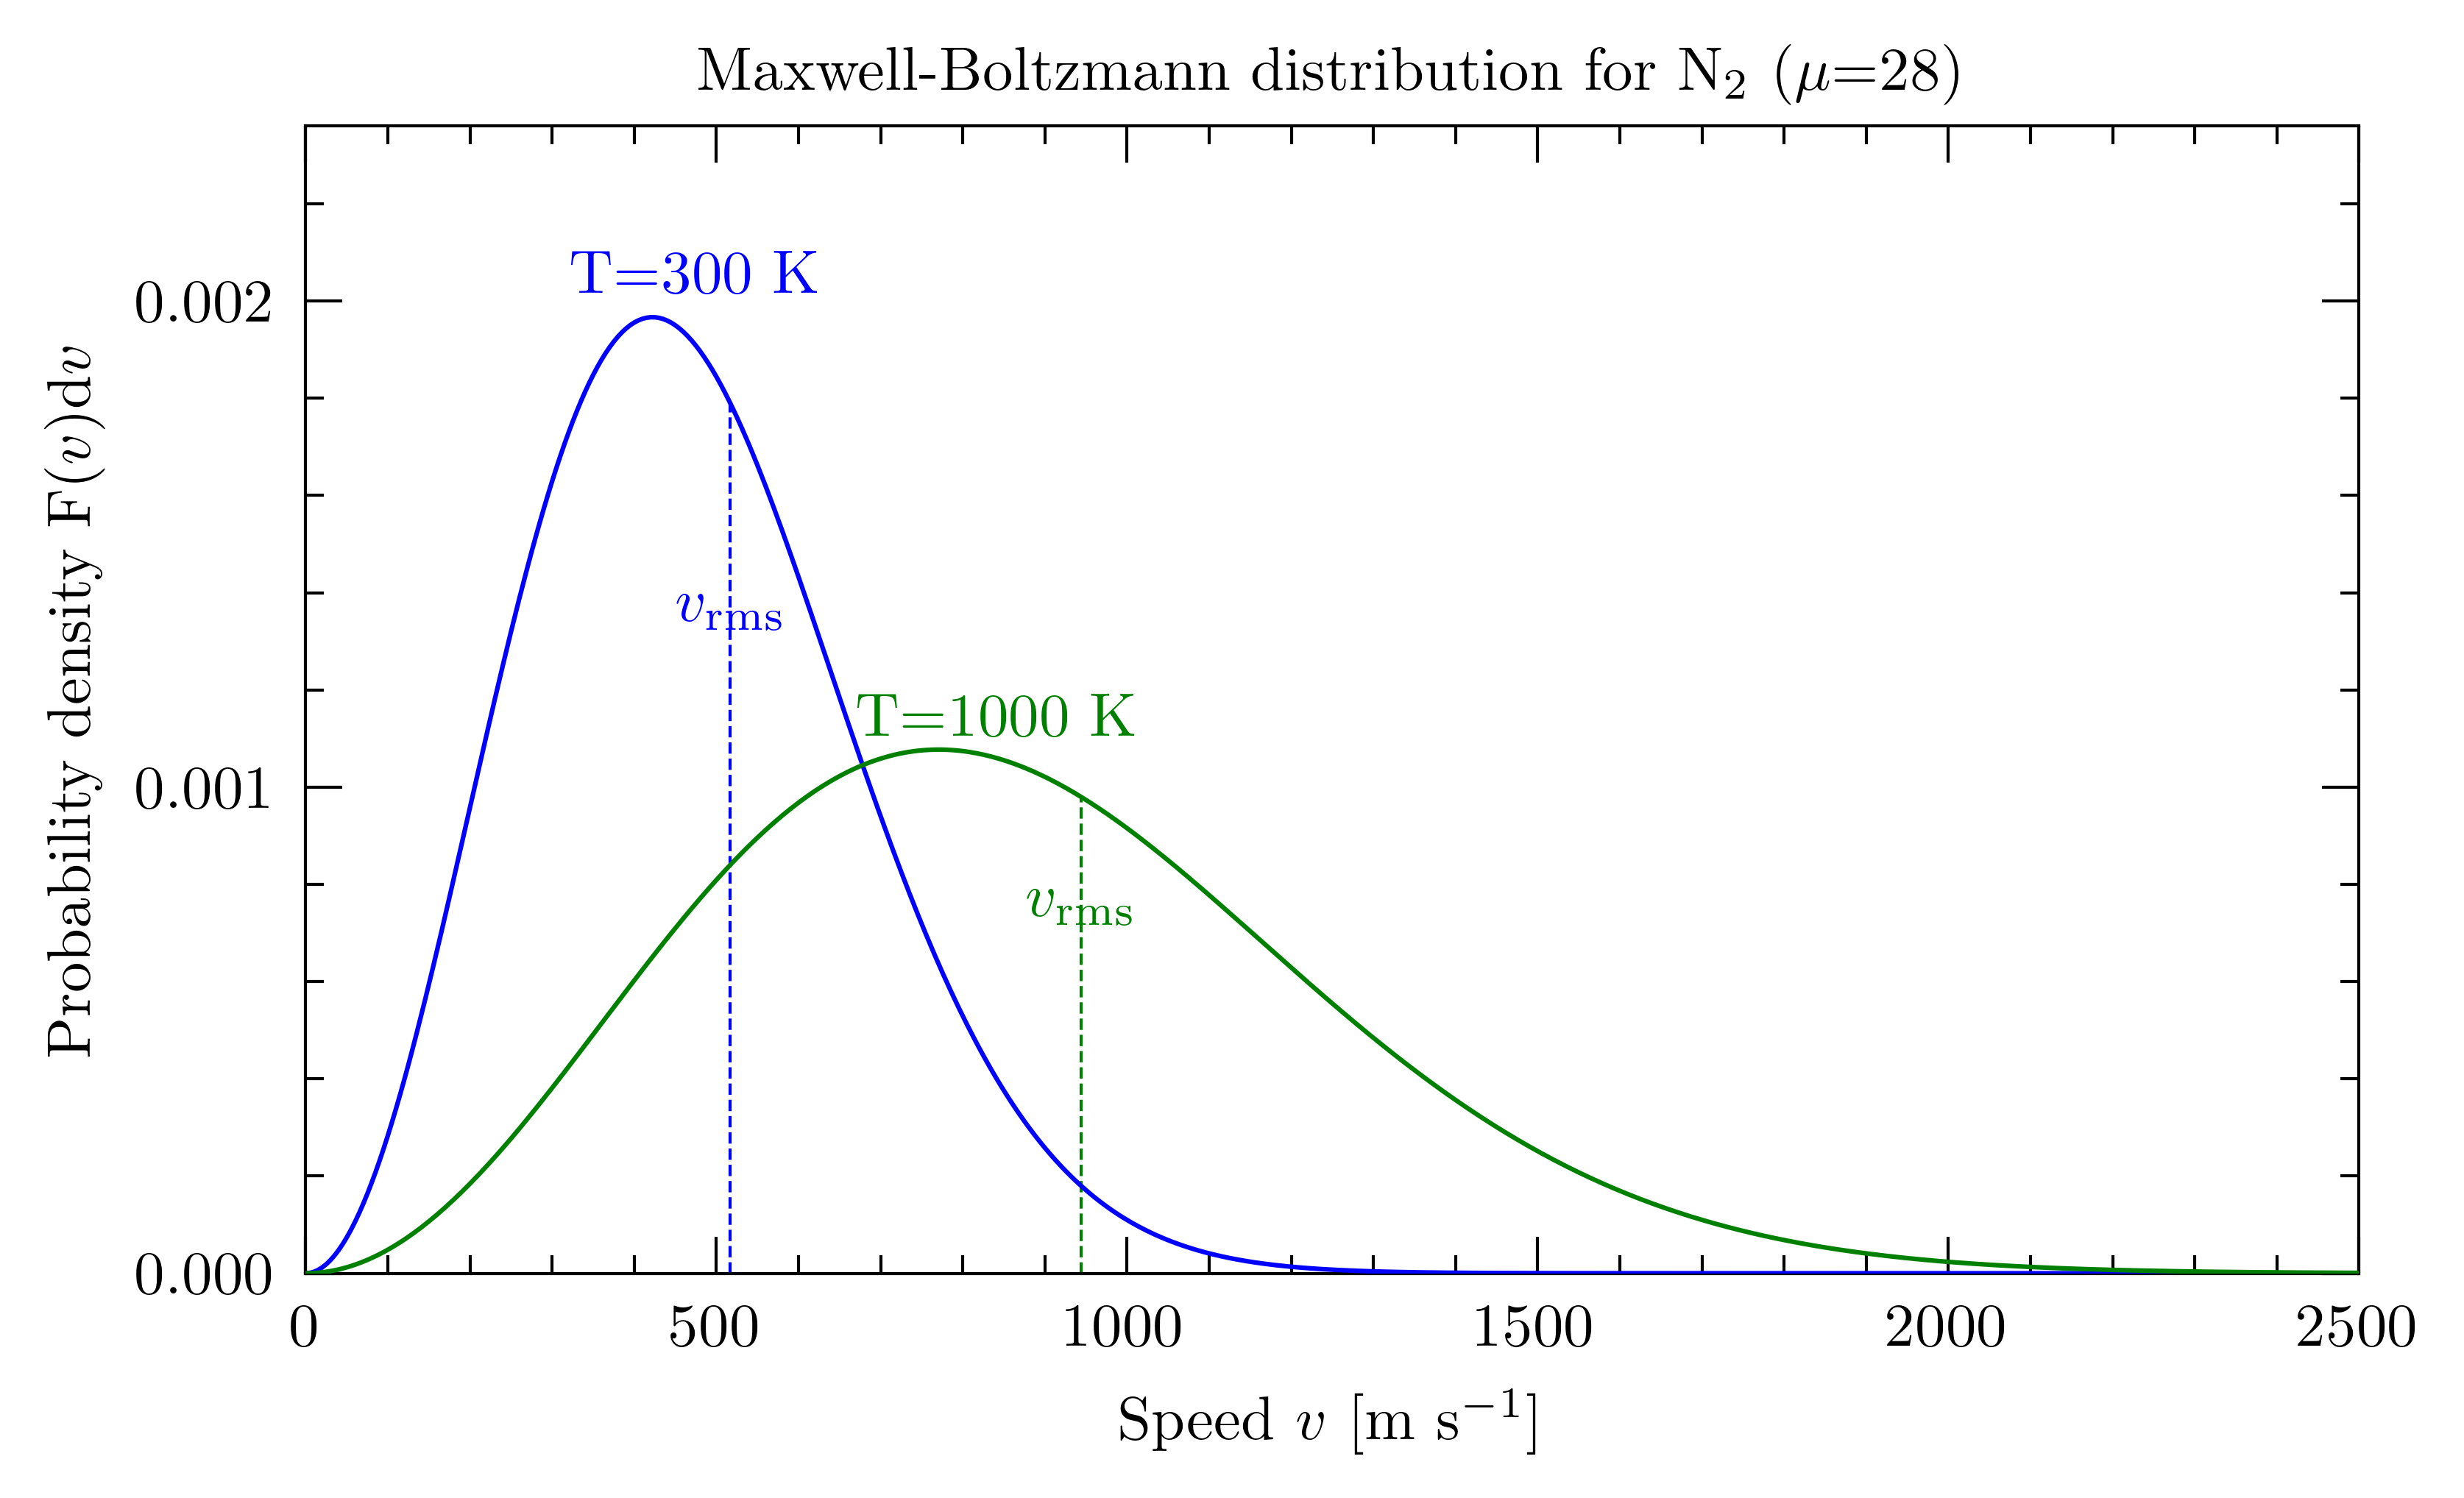

In [17]:
# Species is N2

species = "N$_2$"
mu = 28.0

# Temperatures to compute

Temps = [300.0,1000.0] # Kelvin

colors = ['blue','green']

# speed range

vMin = 0.0 # m/sec
vMax = 2500.0

v = np.linspace(vMin,vMax,501)

mb = {}
vp = {}
vrms = {}
pkMB = {}
rmsMB = {}
for T in Temps:
    mb[T] = mbDist(v,mu,T)
    vp[T],va,vrms[T] = mbSpeeds(mu,T)
    pkMB[T] = mbDist(vp[T],mu,T)
    rmsMB[T] = mbDist(vrms[T],mu,T)
    
mbMin = 0.0
mbMax = 1.2*np.max(mb[300])

# Plot it

fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(vMin,vMax)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.set_xlabel(r'Speed $v$ [m s$^{-1}$]',fontsize=axisFontSize)

ax.set_ylim(mbMin,mbMax)
ax.yaxis.set_major_locator(MultipleLocator(0.001))
ax.yaxis.set_minor_locator(MultipleLocator(0.0002))
ax.set_ylabel(r'Probability density F($v$)d$v$',fontsize=axisFontSize)

for i in range(len(Temps)):
    ax.plot(v,mb[Temps[i]],'-',color=colors[i],lw=0.75,zorder=10)
    ax.vlines(vrms[Temps[i]],mbMin,rmsMB[Temps[i]],ls=['--'],colors=[colors[i]],lw=0.5)
    ax.text(vp[Temps[i]]-100,1.025*pkMB[Temps[i]],f'T={int(Temps[i])} K',color=colors[i],ha='left',fontsize=10)
    ax.text(vrms[Temps[i]],0.75*rmsMB[Temps[i]],r'$v_{\rm rms}$',color=colors[i],ha='center',fontsize=10)

plt.title(r'Maxwell-Boltzmann distribution for %s ($\mu$=%d)' % (species,int(mu)),fontsize=10)

plt.savefig(f'{figName}_N2_2T.png',bbox_inches='tight',facecolor='white')

plt.show()

## M-B in energy form for T=300K

Plot the Maxwell-Boltzmann distribution in energy units for T=300K.

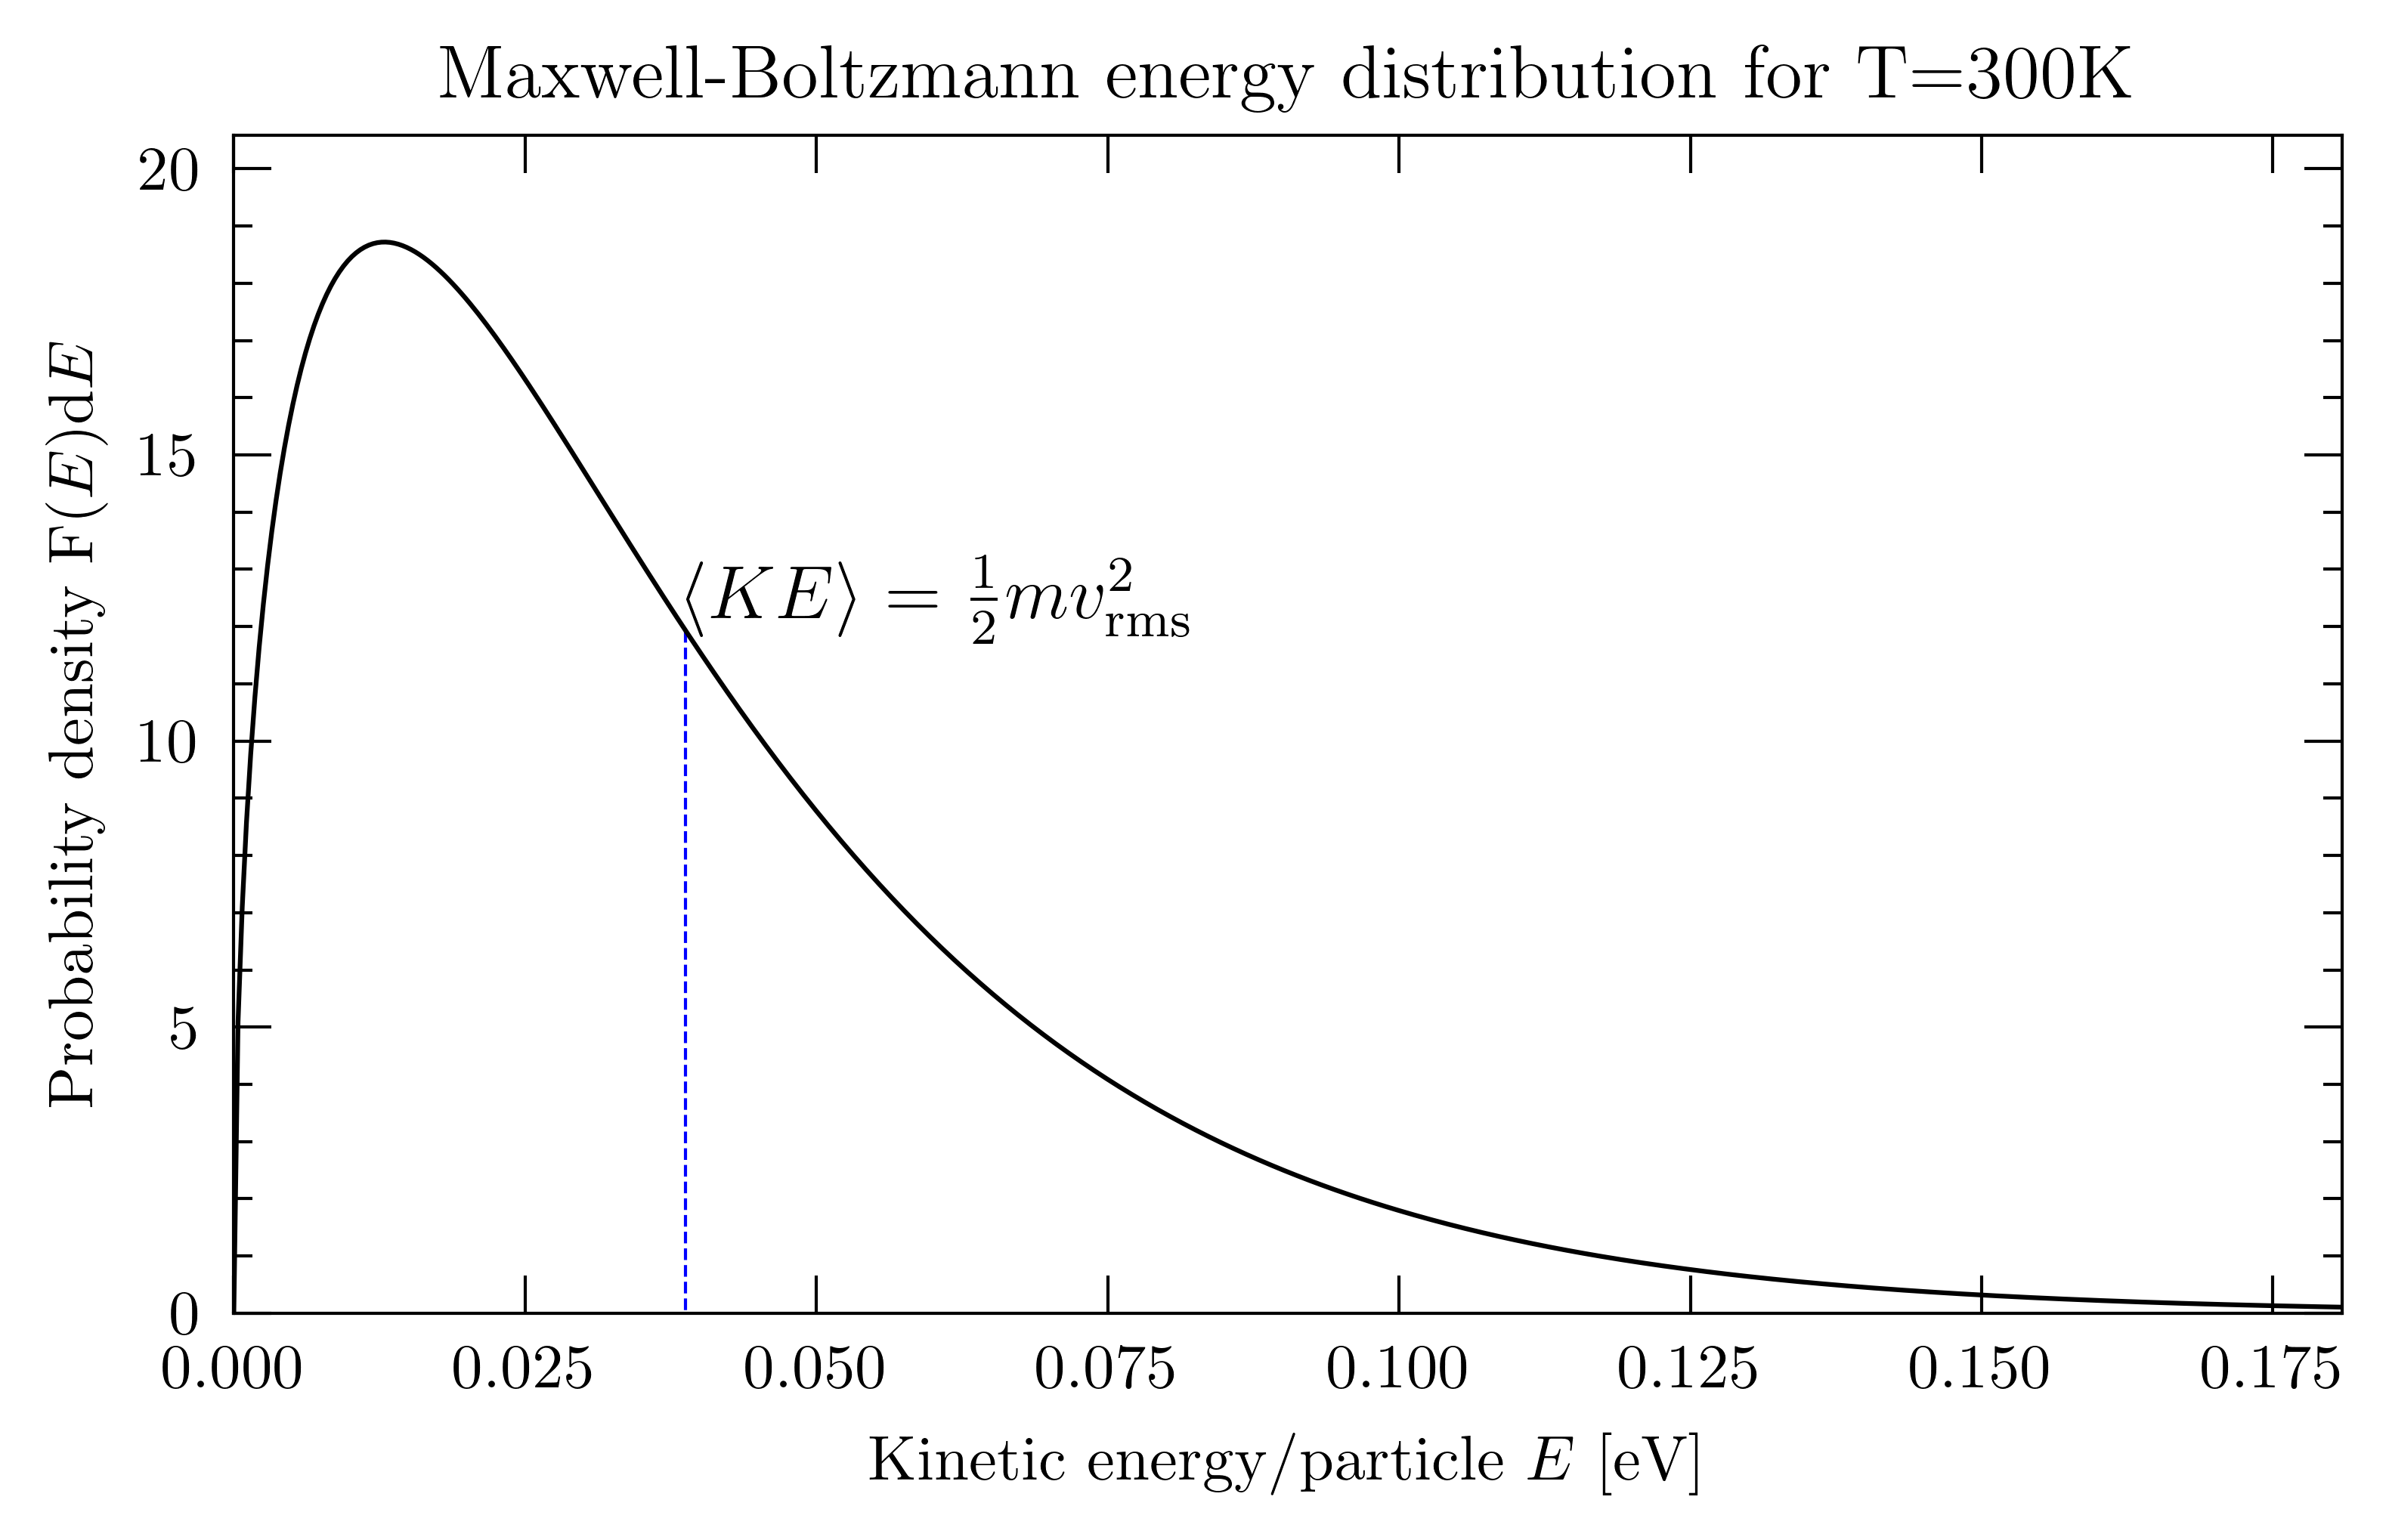

In [18]:
# Temperature to compute

T = 300.0 # Kelvin

# energy scale in electron volts

eScale = eV

# energy range

eMin = 0.0 # J
eMax = 7*k*T

E = np.linspace(eMin,eMax,501)

mbE = mbEDist(E,T)
mbMin = 0.0
mbMax = 1.1*np.max(mbE)*eScale

Erms = 1.5*k*T
rmsMB = mbEDist(Erms,T)

# Plot it

fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(eMin/eScale,eMax/eScale)
#ax.xaxis.set_major_locator(MultipleLocator(2))
#ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_xlabel(r'Kinetic energy/particle $E$ [eV]',fontsize=axisFontSize)

ax.set_ylim(mbMin,mbMax)
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_ylabel(r'Probability density F($E$)d$E$',fontsize=axisFontSize)

ax.plot(E/eScale,mbE*eScale,'-',color='black',lw=0.75,zorder=10)

ax.vlines(Erms/eScale,rmsMB*eScale,mbMin,ls=['--'],colors=['blue'],lw=0.5)
ax.text(Erms/eScale,1.02*rmsMB*eScale,r'$\langle KE\rangle = \frac{1}{2}mv_{\rm rms}^2$',
        color='black',ha='left',fontsize=12)

plt.title(rf'Maxwell-Boltzmann energy distribution for T={int(T)}K',fontsize=12)

plt.savefig(f'{figName}_eV_300K.png',bbox_inches='tight',facecolor='white')

plt.show()

## M-B for the constituents of dry air at T=300K

Plot the Maxwell-Boltzmann distribution for the primary constituents of dry air at T=300K.

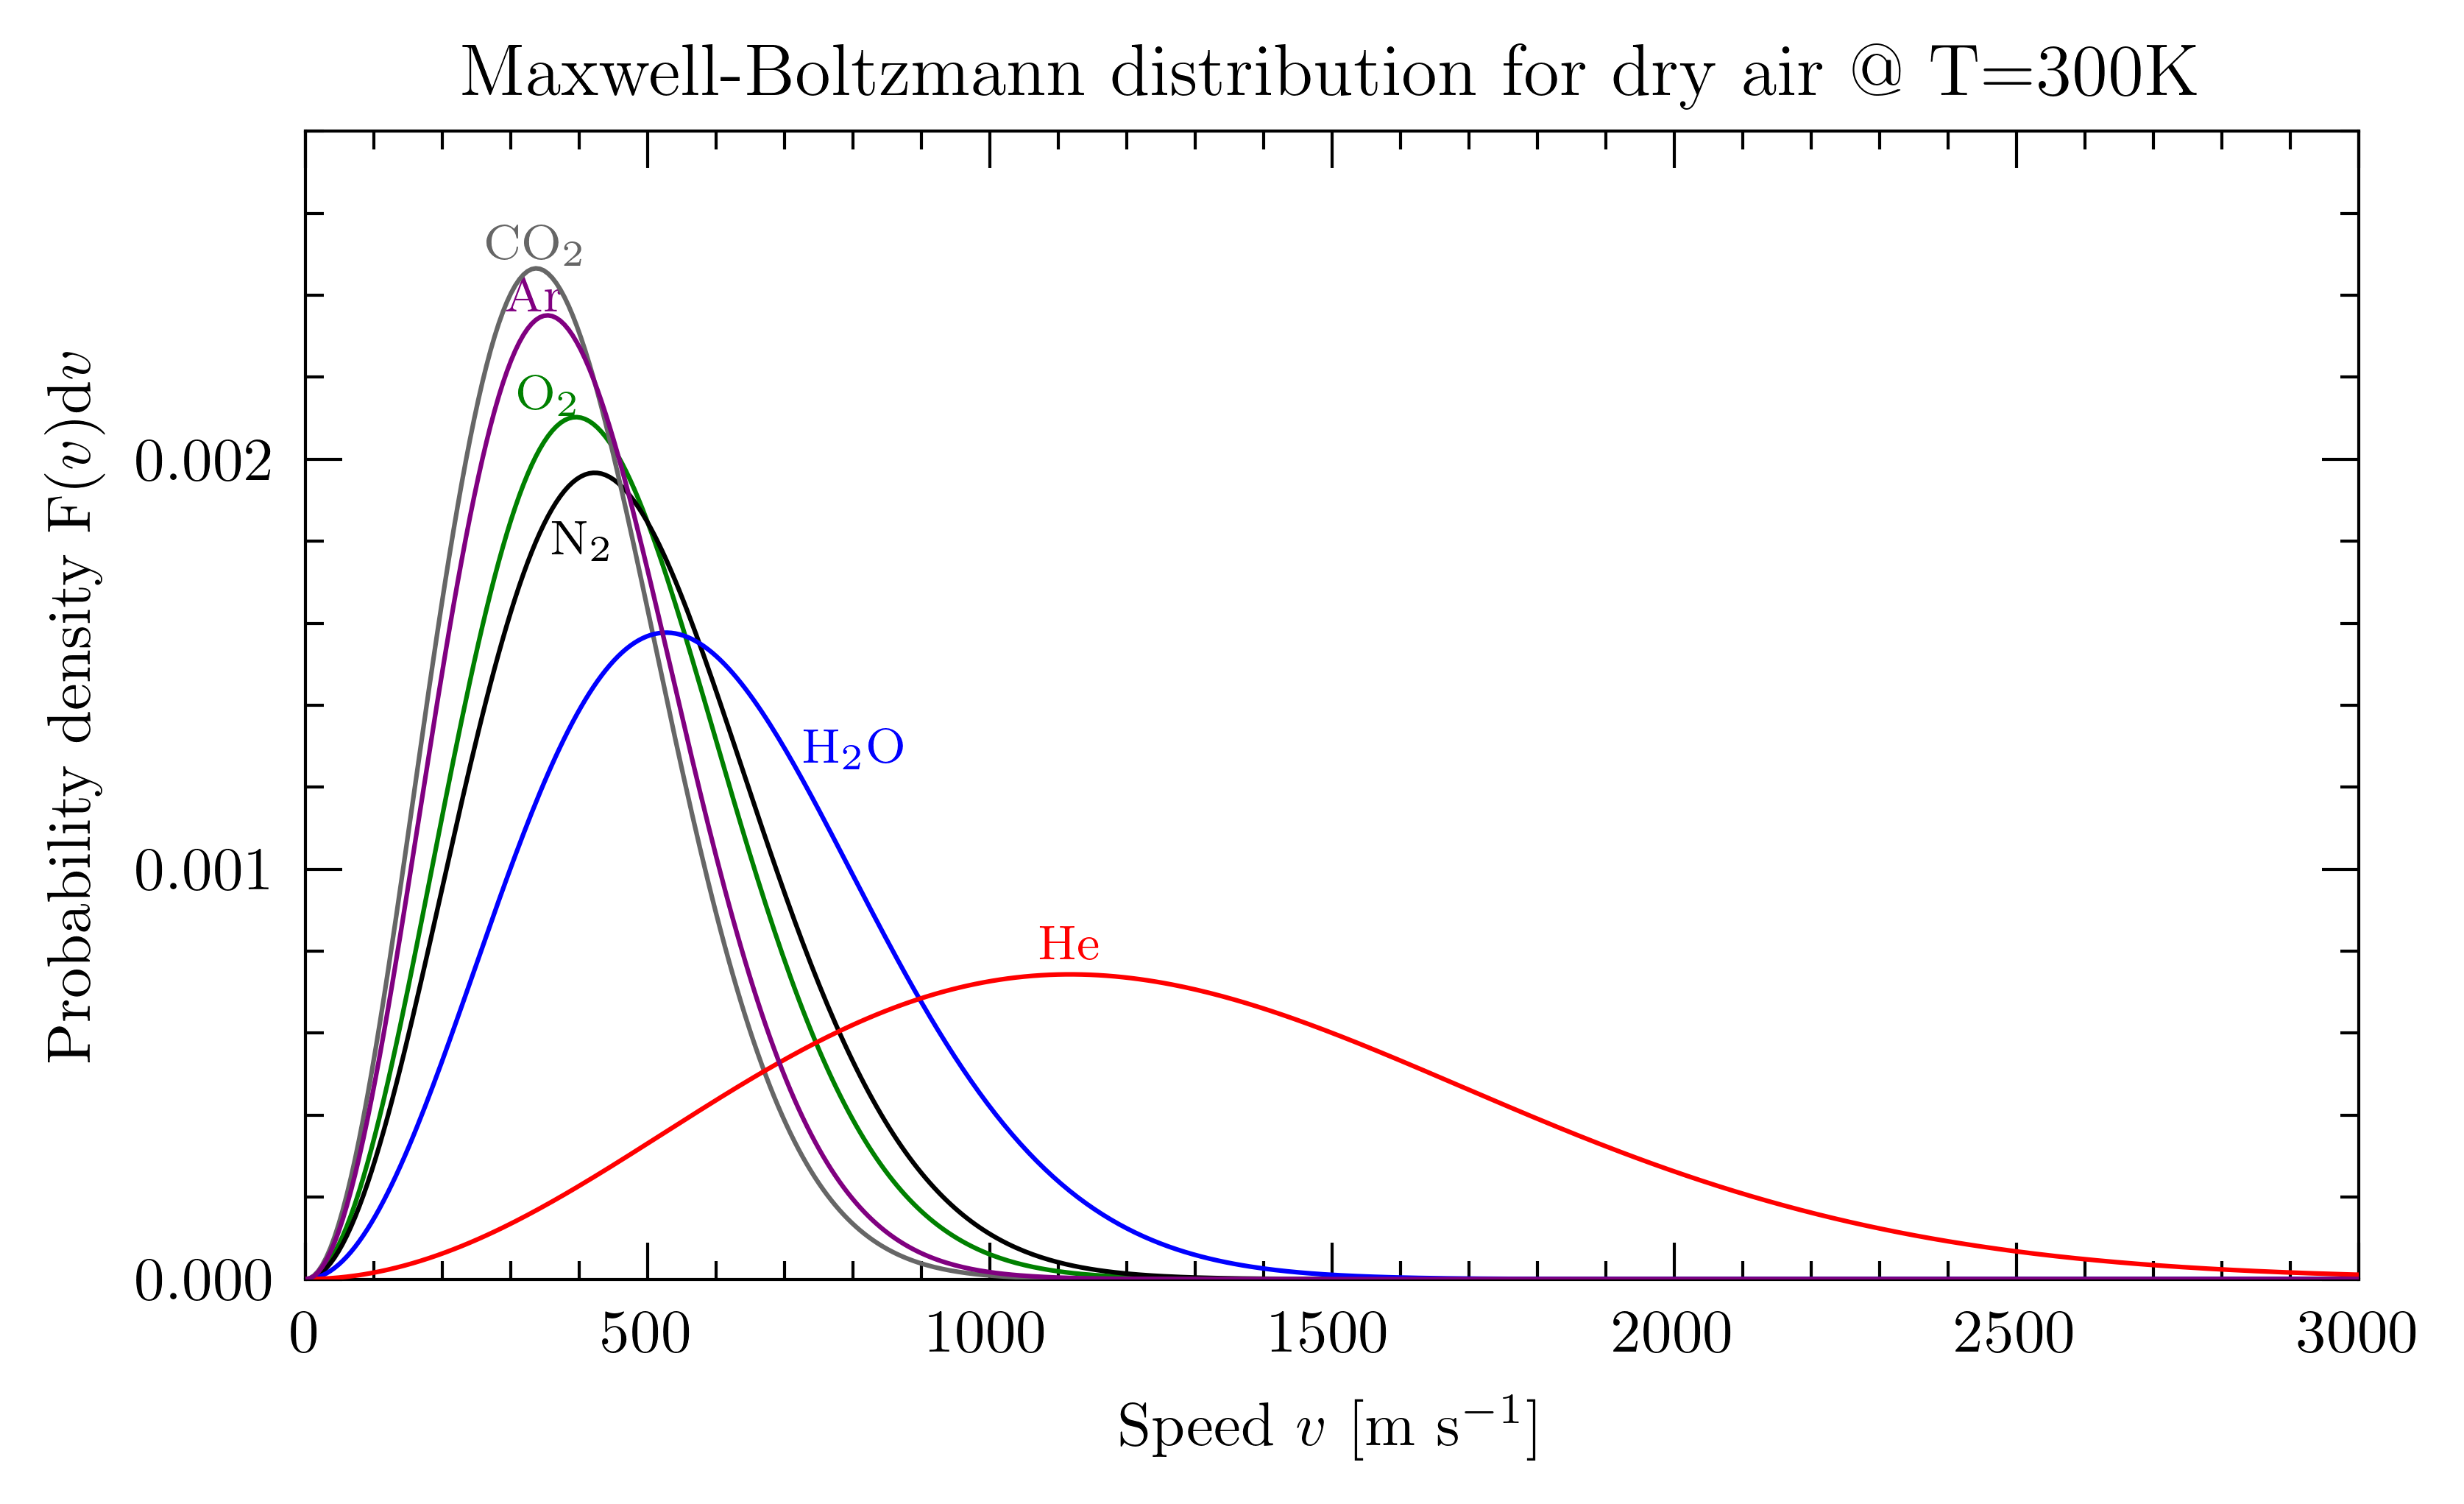

In [19]:
# Major components of dry air

species = ["O$_2$","N$_2$","CO$_2$","H$_2$O","He","Ar"]
mu = [32.0   ,28.0   ,44.0    ,18.0    ,4.0 ,40.0]  # AMU
specCol  = ["green","black","#666666","blue","red","purple"]
specXOff = [0.9    ,0.85   ,1.0      ,1.38  ,1.0  ,0.95]
specYOff = [1.01   ,0.9    ,1.01     ,0.8   ,1.05 ,1.005]
specJust = ['center','left','center','left','center','center']

# Temperature to compute

T = 300.0 # Kelvin

colors = ['blue','green']

# speed range and limits

vMin = 0.0 # m/sec
vMax = 3000.0

v = np.linspace(vMin,vMax,501)

mbMin = 0.0
mbMax = 0.0028

# Plot it

fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(vMin,vMax)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.set_xlabel(r'Speed $v$ [m s$^{-1}$]',fontsize=axisFontSize)

ax.set_ylim(mbMin,mbMax)
ax.yaxis.set_major_locator(MultipleLocator(0.001))
ax.yaxis.set_minor_locator(MultipleLocator(0.0002))
ax.set_ylabel(r'Probability density F($v$)d$v$',fontsize=axisFontSize)

for i in range(len(species)):
    ax.plot(v,mbDist(v,mu[i],T),'-',color=specCol[i],lw=0.75,zorder=10)
    vp,va,vf = mbSpeeds(mu[i],T)
    pkMB = mbDist(vp,mu[i],T)
    ax.text(specXOff[i]*vp,specYOff[i]*pkMB,f'{species[i]}',color=specCol[i],ha=specJust[i],fontsize=8)

plt.title(rf'Maxwell-Boltzmann distribution for dry air @ T={int(T)}K',fontsize=12)

plt.savefig(f'{figName}_dryAir_300K.png',bbox_inches='tight',facecolor='white')

plt.show()

## M-B for the constituents of dry air at T=300K

Same as above, but scales components by constituent fraction

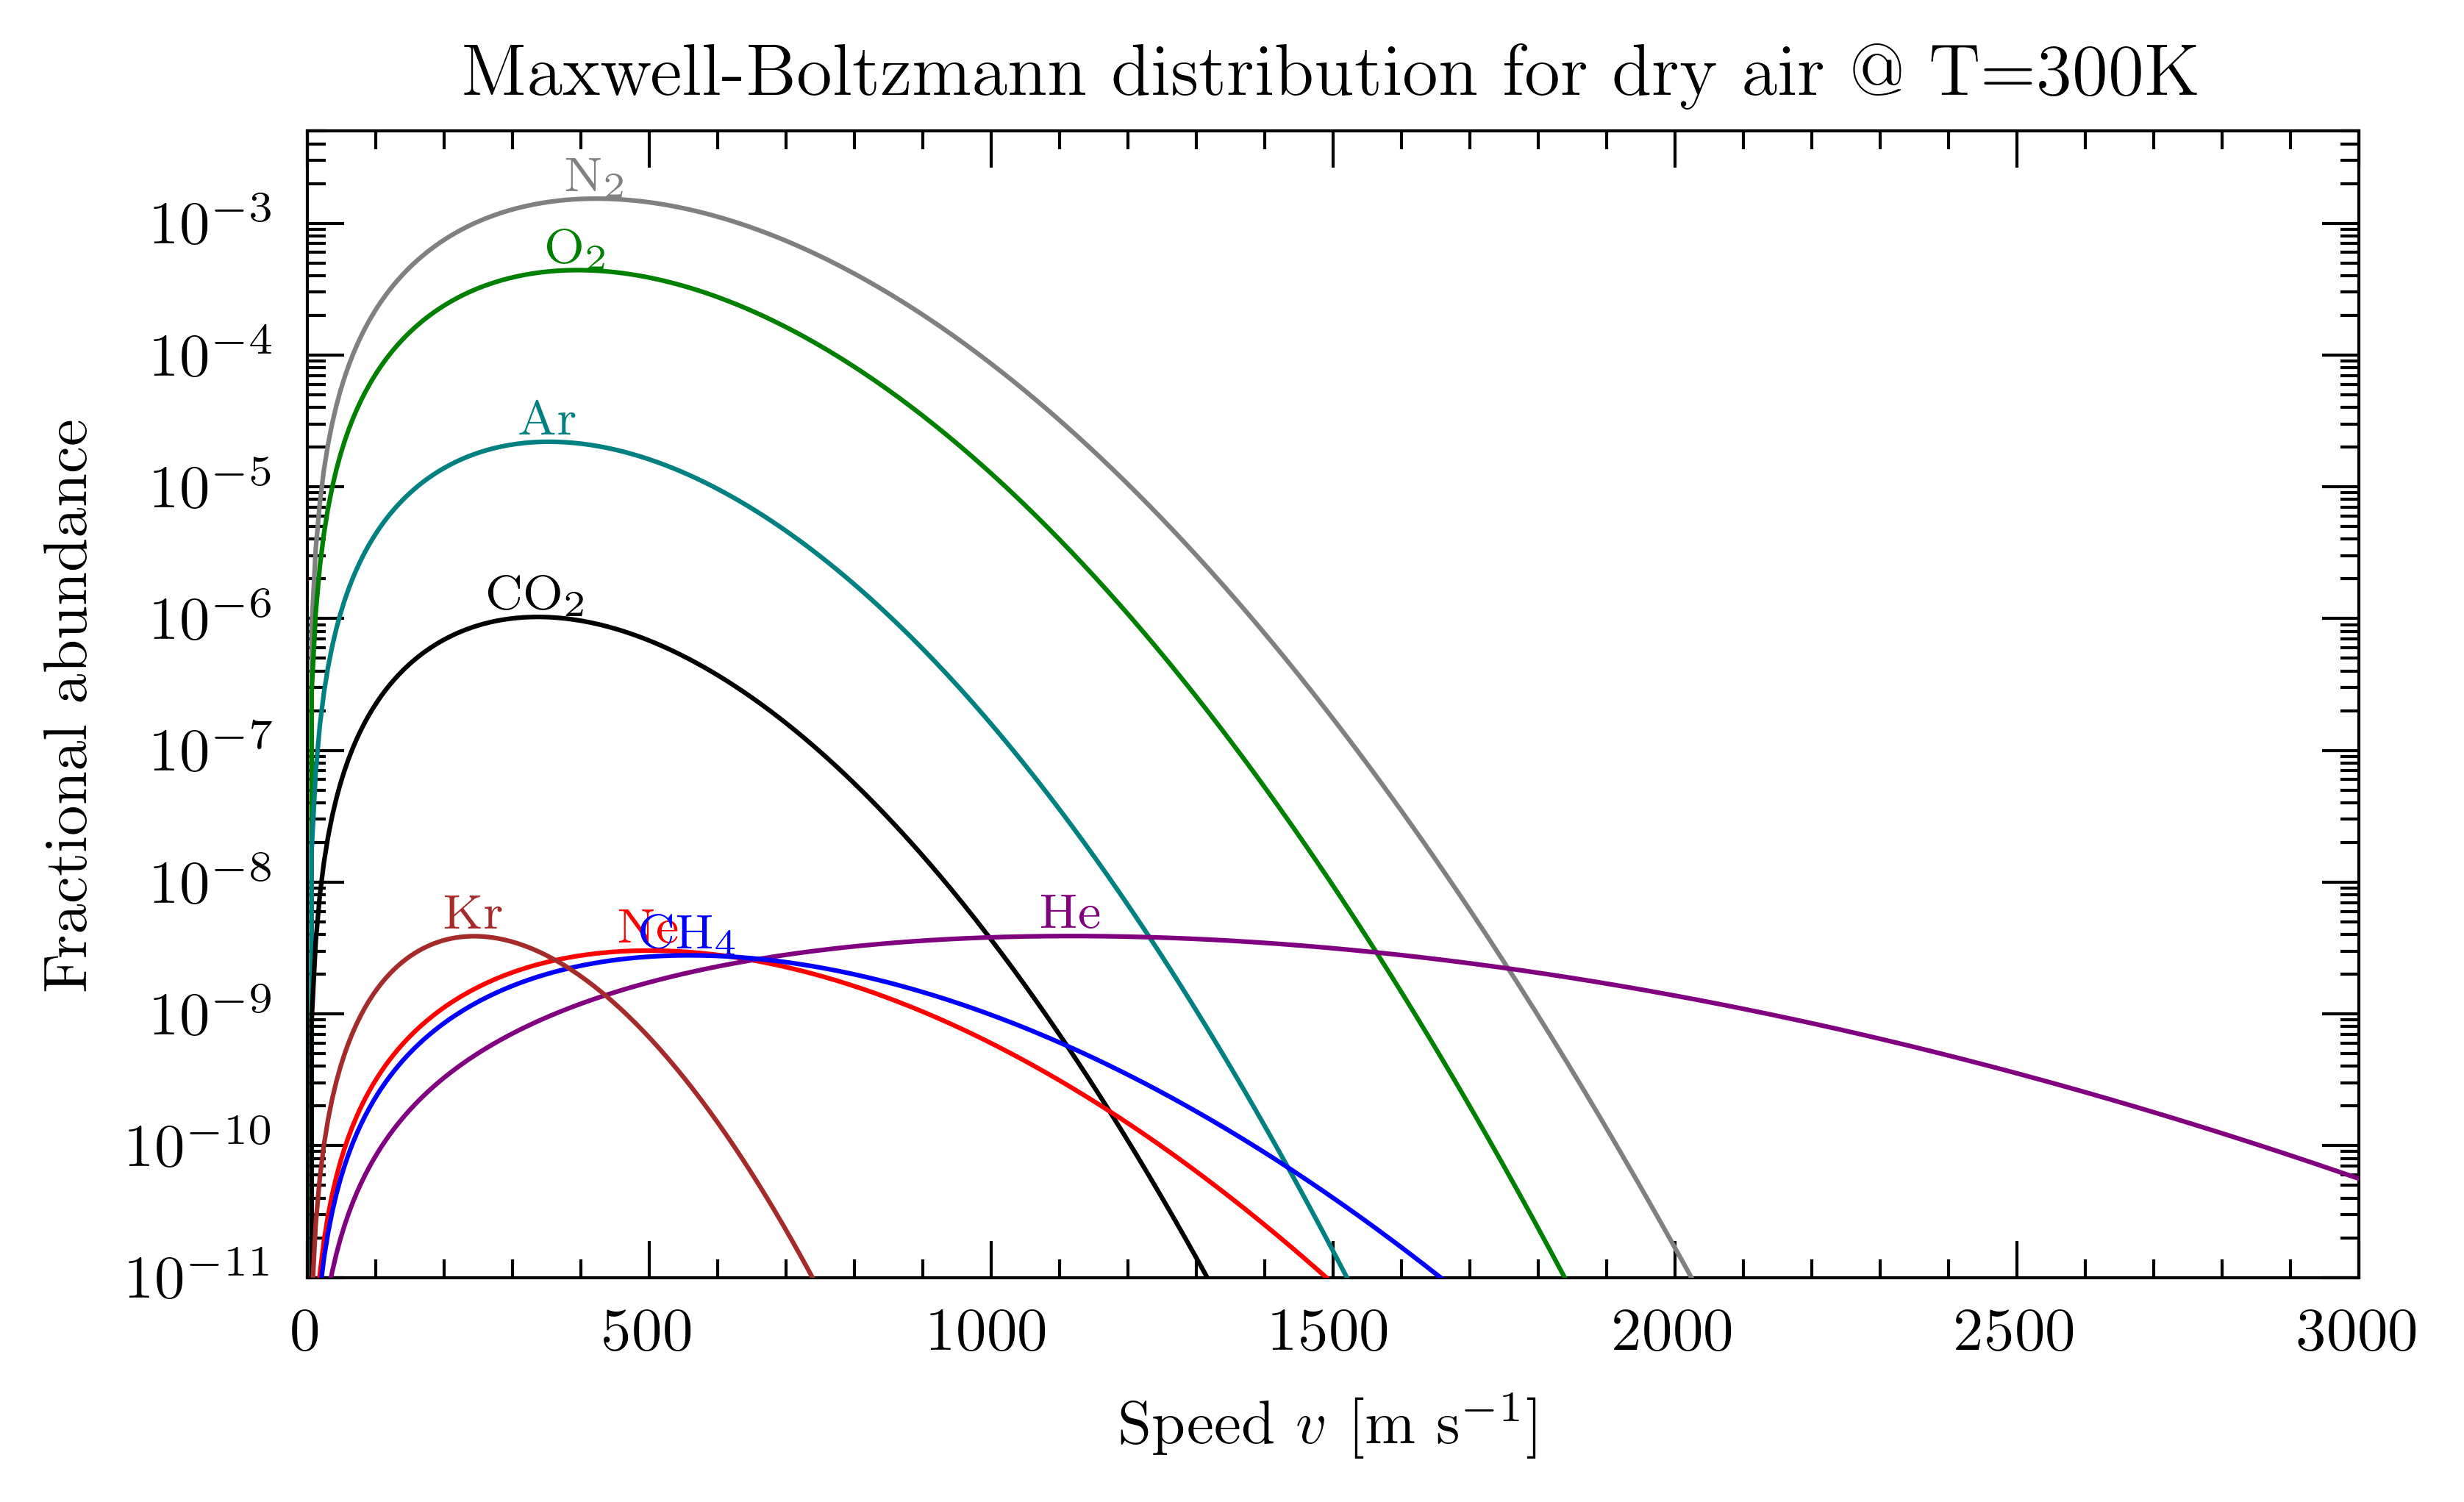

In [20]:
# Major components of dry air

species = ["N$_2$","O$_2$","Ar","CO$_2$","Ne","He","CH$_4$","Kr"]
mu = [28.0,32.0,40.0,44.0,20.0,4.0,16.0,84.0]  # AMU
abundance = [0.78084,0.20946,0.009340,0.000417,0.000001818,0.00000524,0.00000187,0.00000114]
specCol  = ["gray","green","teal","black","red","purple","blue","brown"]
specXOff = [0.9    ,0.85   ,1.0      ,1.38  ,1.0  ,0.95, 1.0, 1.0]
specYOff = [1.01   ,0.9    ,1.01     ,0.8   ,1.05 ,1.005, 1.01, 1.01]
specJust = ['center','left','center','left','center','center','center','center']

# Temperature to compute

T = 300.0 # Kelvin

# speed range and limits

vMin = 0.0 # m/sec
vMax = 3000.0

v = np.linspace(vMin,vMax,501)

mbMin = 1.0e-11
mbMax = 0.005

# Plot it

fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(vMin,vMax)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.set_xlabel(r'Speed $v$ [m s$^{-1}$]',fontsize=axisFontSize)

ax.set_ylim(mbMin,mbMax)
ax.set_yscale('log')
#ax.yaxis.set_major_locator(MultipleLocator(0.001))
#ax.yaxis.set_minor_locator(MultipleLocator(0.0002))
ax.set_ylabel(r'Fractional abundance',fontsize=axisFontSize)

for i in range(len(species)):
    ax.plot(v,abundance[i]*mbDist(v,mu[i],T),'-',color=specCol[i],lw=0.75,zorder=10)
    vp,va,vf = mbSpeeds(mu[i],T)
    pkMB = abundance[i]*mbDist(vp,mu[i],T)
    ax.text(vp,1.15*pkMB,f'{species[i]}',color=specCol[i],ha='center',fontsize=8)

plt.title(rf'Maxwell-Boltzmann distribution for dry air @ T={int(T)}K',fontsize=12)

plt.savefig(f'{figName}_dryAirFrac_300K.png',bbox_inches='tight',facecolor='white')

plt.show()